# Probability Theory and Distributions

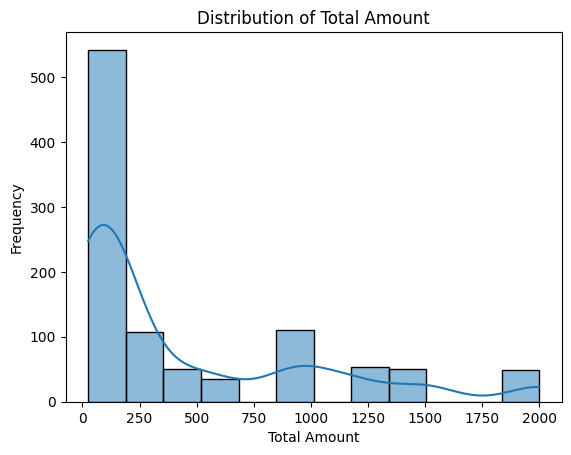

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, probplot

df = pd.read_csv("https://raw.githubusercontent.com/Data-Navigators/Statistical_Concept_Excercise/main/data/Retail_sales_dataset.csv")

sns.histplot(df['Total Amount'], kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()



# Q-Q plot

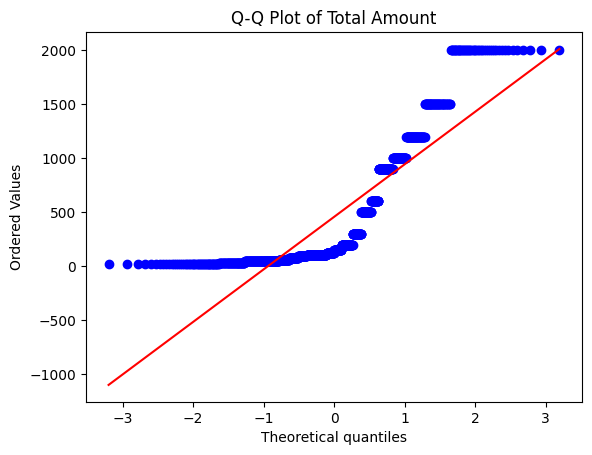

In [7]:
probplot(df['Total Amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Amount')
plt.show()

# Shapiro-Wilk Test for normality

In [ ]:
stat, p_value = shapiro(df['Total Amount'])
print(f"Shapiro-Wilk Test: Statistic={stat}, P-value={p_value}")

# Interpret the test
if p_value > 0.05:
    print("Data is likely normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

# Poisson Distribution

In [13]:
from scipy.stats import poisson
import numpy as np

daily_transactions = df.groupby('Date')['Total Amount'].count()
mean_transactions = daily_transactions.mean()

# Probability Mass Function (PMF) 

In [14]:
poisson_prob = poisson.pmf(10, mean_transactions)
print(f"Probability of 10 transactions on a day: {poisson_prob}")

Probability of 10 transactions on a day: 0.0006356549468781112


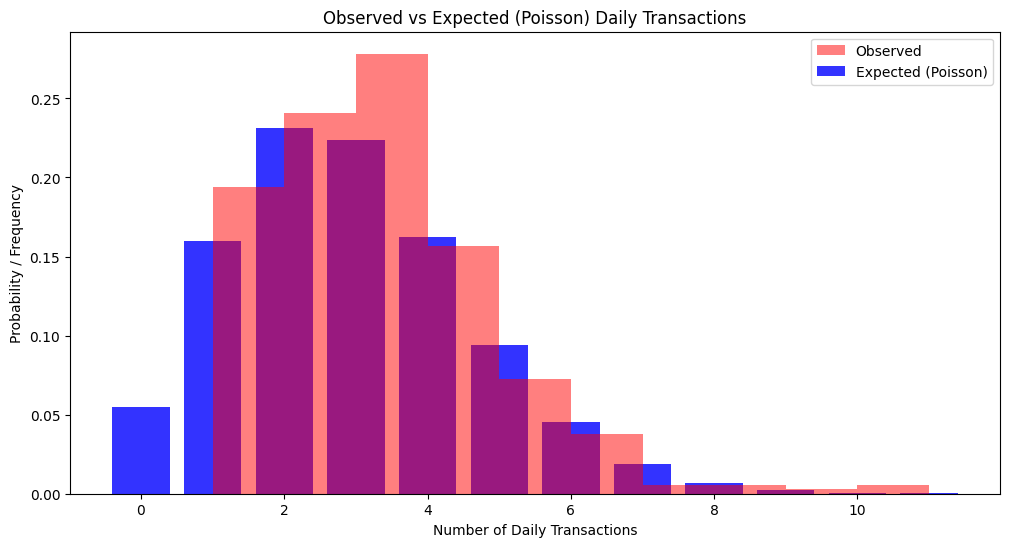

In [16]:
from scipy import stats
poisson_dist = stats.poisson(mean_transactions)
x = np.arange(0, int(daily_transactions.max()) + 1)
y = poisson_dist.pmf(x)
plt.figure(figsize=(12, 6))
plt.bar(x, y, alpha=0.8, color='b', label='Expected (Poisson)')
plt.hist(daily_transactions, density=True, alpha=0.5, color='r', label='Observed')
plt.xlabel('Number of Daily Transactions')
plt.ylabel('Probability / Frequency')
plt.title('Observed vs Expected (Poisson) Daily Transactions')
plt.legend()
plt.show()